# Bank Chrun Analysis Model Using Scikit-Learn

## Importing Required Modules

In [215]:
import pandas as pd
import numpy as np
import seaborn as ses
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,normalize
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score,log_loss,balanced_accuracy_score
from sklearn.model_selection import validation_curve,learning_curve
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
import graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals.six import StringIO  
from IPython.display import Image,Markdown,display
import pydot
import random
from subprocess import call
import scikitplot as skplt
import sys
import cgi
from time import sleep
%matplotlib inline

# Preprocessing

## Getting information from CSV file

In [34]:
data_frame = pd.read_csv('Churn_Modelling.csv')
data_frame

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


# Resampling 

In [152]:
df_majority = data_frame[data_frame.Exited==0]
df_minority = data_frame[data_frame.Exited==1]
new_data=df_majority.sample(n=3000)
churn_data_set = pd.concat([df_minority,new_data],axis='rows')
data_frame=churn_data_set

In [154]:
data_frame

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
16,653,Germany,Male,58,1,132602.88,1,1,0,5097.67,1
...,...,...,...,...,...,...,...,...,...,...,...
3071,798,France,Male,32,7,0.00,2,0,1,37731.95,0
8440,663,Spain,Female,33,8,96769.04,1,1,1,36864.05,0
2833,683,Spain,Male,40,8,0.00,1,1,0,75848.22,0
711,634,Germany,Male,35,6,116269.01,1,1,0,129964.94,0


# Seprating the Numerical_features and Catagorical_features

In [155]:
numerical_features = ['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary']
catagorical_features = ['Geography','Gender','HasCrCard','IsActiveMember']
numerical_features_data_set = data_frame[numerical_features]
catagorical_features_data_set=data_frame[catagorical_features]

## From the dataset the ratio of Chruned and Not-Chruned is

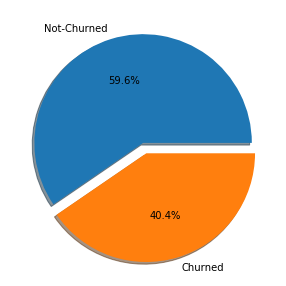

0    3000
1    2037
Name: Exited, dtype: int64

In [156]:
figure_1,ax_1 = plt.subplots(1,1,figsize=(5,5))
ax_1.pie(data_frame['Exited'].value_counts(),labels=['Not-Churned','Churned'],autopct='%1.1f%%', shadow=True,explode=(0,0.1))
plt.show()
data_frame['Exited'].value_counts()

### Now as you can see that the dataset consist of highly varying numerical attributes 

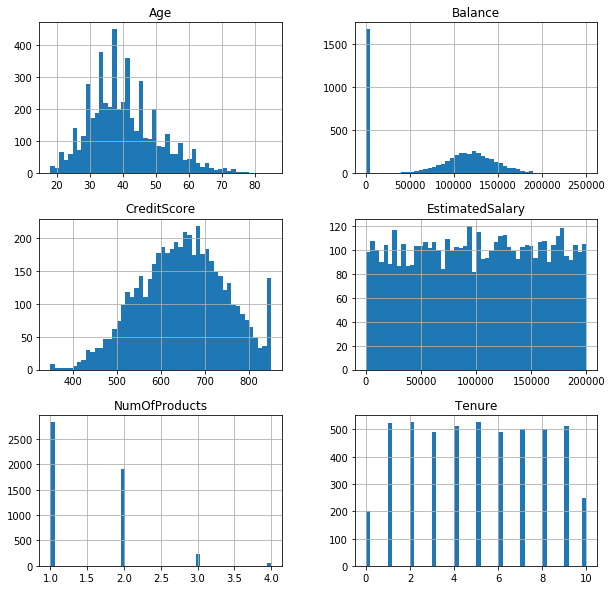

In [157]:
kwargs = dict(alpha=1, bins=50,figsize=(10,10))
data_frame[numerical_features].hist(**kwargs)
plt.show()

### Since the data features might not be enoughed for our classifier lets add more columns to it 
Make to more coloumns, we have taken CreditScore/No.of Products and Balance/CreditScore

In [158]:
numerical_features_data_set['CRS_to_PROD'] = numerical_features_data_set['CreditScore']/numerical_features_data_set['NumOfProducts']
numerical_features_data_set['BAL_to_CRS'] = numerical_features_data_set['Balance']/numerical_features_data_set['CreditScore']
numerical_features_data_set

g:\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
g:\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,CRS_to_PROD,BAL_to_CRS
0,619,42,2,0.00,1,101348.88,619.000000,0.000000
2,502,42,8,159660.80,3,113931.57,167.333333,318.049402
5,645,44,8,113755.78,2,149756.71,322.500000,176.365550
7,376,29,4,115046.74,4,119346.88,94.000000,305.975372
16,653,58,1,132602.88,1,5097.67,653.000000,203.067198
...,...,...,...,...,...,...,...,...
3071,798,32,7,0.00,2,37731.95,399.000000,0.000000
8440,663,33,8,96769.04,1,36864.05,663.000000,145.956320
2833,683,40,8,0.00,1,75848.22,683.000000,0.000000
711,634,35,6,116269.01,1,129964.94,634.000000,183.389606


# Now let's see the effect of numerical_features on Chrun

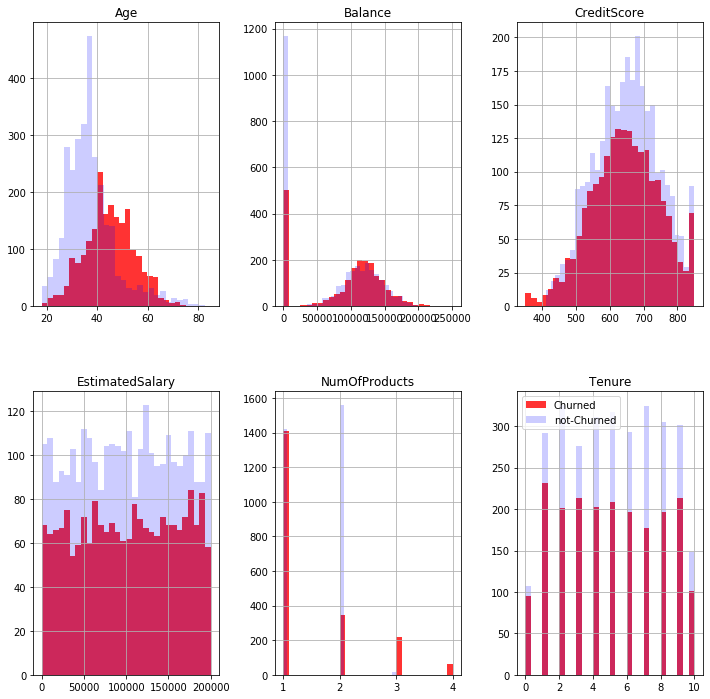

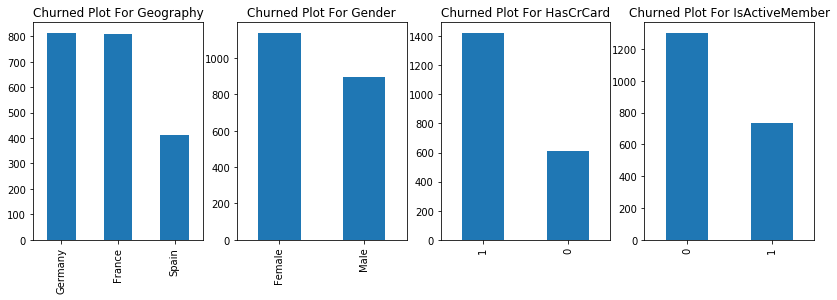

In [159]:
fig_new,ax_new =plt.subplots(2,3,figsize=(12,12))
data_frame[data_frame.Exited==1][numerical_features].hist(color='red',alpha=0.8,ax=ax_new,bins=30,label="Churned")
data_frame[data_frame.Exited==0][numerical_features].hist(color='blue',alpha=0.2,ax=ax_new,bins=30,label="not-Churned")
plt.legend()
plt.show()

feature = ['Geography','Gender','HasCrCard','IsActiveMember']
fig, ax = plt.subplots(1, 4, figsize=(14, 4))
for i in range(4):
    
    data_frame[data_frame.Exited == 1][feature[i]].value_counts().plot(kind="bar", ax=ax[i]).set_title("Churned Plot For "+str(feature[i]))

Data contains string elements so we need to encode it to numerical ones before that lets seprate the target value from the dataset

In [160]:
y = data_frame['Exited']
data_frame = data_frame.drop(['RowNumber','CustomerId','Surname'],axis='columns')

KeyError: "['RowNumber' 'CustomerId' 'Surname'] not found in axis"

In [161]:
Gender_dummy = pd.get_dummies(catagorical_features_data_set.Gender)
Geography_dummy = pd.get_dummies(catagorical_features_data_set.Geography)

In [162]:
final_data = pd.concat([numerical_features_data_set,Gender_dummy,Geography_dummy,catagorical_features_data_set.IsActiveMember,catagorical_features_data_set.HasCrCard],axis='columns') 
final_data

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,CRS_to_PROD,BAL_to_CRS,Female,Male,France,Germany,Spain,IsActiveMember,HasCrCard
0,619,42,2,0.00,1,101348.88,619.000000,0.000000,1,0,1,0,0,1,1
2,502,42,8,159660.80,3,113931.57,167.333333,318.049402,1,0,1,0,0,0,1
5,645,44,8,113755.78,2,149756.71,322.500000,176.365550,0,1,0,0,1,0,1
7,376,29,4,115046.74,4,119346.88,94.000000,305.975372,1,0,0,1,0,0,1
16,653,58,1,132602.88,1,5097.67,653.000000,203.067198,0,1,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3071,798,32,7,0.00,2,37731.95,399.000000,0.000000,0,1,1,0,0,1,0
8440,663,33,8,96769.04,1,36864.05,663.000000,145.956320,1,0,0,0,1,1,1
2833,683,40,8,0.00,1,75848.22,683.000000,0.000000,0,1,0,0,1,0,1
711,634,35,6,116269.01,1,129964.94,634.000000,183.389606,0,1,0,1,0,0,1


# Now let's split the data into training and testing

In [163]:
y= data_frame['Exited']
X = final_data
X_train1,X_test1,y_train1,y_test1= train_test_split(X,y,test_size = 0.2,random_state=13)
X_train = X_train1.to_numpy()
X_test = X_test1.to_numpy()
y_train = y_train1.to_numpy()
y_test = y_test1.to_numpy()


In [164]:
y_test1.value_counts()

0    609
1    399
Name: Exited, dtype: int64

In [165]:
d = np.where(y_test==0, 'Not_Churned', y_test)
labels=np.where(y_test==1,'Churned',d)
labels

array(['Not_Churned', 'Churned', 'Not_Churned', ..., 'Churned',
       'Not_Churned', 'Not_Churned'], dtype='<U21')

# Now it's time to train our model usign classifier
we will use DecisionTreeClassifier to train it

In [226]:
try:
    
 
    def churned_pie(dec_clf_predict):
        dec_tree_clf_predict_pis = pd.Series(dec_clf_predict)
        figure_1,ax_1 = plt.subplots(1,1,figsize=(5,5))
        display(Markdown(f"<h3>Test Data</h3>"))
        ax_1.pie(pd.Series(y_test).value_counts(),labels=['Not-Churned','Churned'],autopct='%1.1f%%', shadow=True,explode=(0,0.1))
        plt.show()
        figure_1,ax_1 = plt.subplots(1,1,figsize=(5,5))
        display(Markdown(f"<h3>Predicted Data</h3>"))
        ax_1.pie(dec_tree_clf_predict_pis.value_counts(),labels=['Not-Churned','Churned'],autopct='%1.1f%%', shadow=True,explode=(0,0.1))
        plt.show()        
    def progress(count, total, status=''):
        bar_len = 60
        filled_len = int(round(bar_len * count / float(total)))

        percents = round(100.0 * count / float(total), 1)
        bar = '=' * filled_len + '-' * (bar_len - filled_len)

        sys.stdout.write('[%s] %s%s ...%s\r' % (bar, percents, '%', status))
        sys.stdout.flush()
    def classifier_fun():
        
        display(Markdown("""<div class="alert alert-block alert-info">
<b>Training the model:</b>Using Customized RandomForestClassifier with randmoizer parameters to achive around 80% accuracy.
</div>"""))
        sleep(2)
        count_itter = 1
        while True:
            model = RandomForestClassifier(max_depth=random.randint(2,7),max_features=random.randint(5,15),max_leaf_nodes=random.randint(1000,2500),n_estimators=200)
            model.fit(X_train,y_train)
            model_predict = model.predict(X_test)
            cm = confusion_matrix(y_test,model_predict)
        
            
            if  model.score(X_train,y_train)>model.score(X_test,y_test) and model.score(X_train,y_train)>0.81 and model.score(X_train,y_train) - model.score(X_test,y_test) < 0.04:
                display(Markdown(f"<h1>Accuracy Report</h1>"))
                print("Average Accuracy "+str(accuracy_score(y_test,model_predict.reshape(-1,1))*100))
                print("Training Accuracy "+str(model.score(X_train,y_train)*100))  
                print("Test Accuracy "+str(model.score(X_test,y_test)*100))
                print("Log_Los "+str(log_loss(y_test,model_predict.reshape(-1,1)*100)))
                display(Markdown(f"<h1>Learned Parameters</h1>"))
                print("Max_depth "+str(model.max_depth))
                print("Max_leaf_nodes "+str(model.max_leaf_nodes))
                print("Max_Features "+str(model.max_features))
                display(Markdown(f"<h1>Classification report</h1>"))
                print(classification_report(y_test,model_predict.reshape(-1,1)))
                display(Markdown(f"<h1>Validation Curve</h1>"))
                param_range = np.arange(1, model.max_depth, 1)
                train_scores, test_scores = validation_curve(DecisionTreeClassifier(max_leaf_nodes=model.max_leaf_nodes,max_features=model.max_features),X,y,param_name='max_depth',param_range=param_range,cv=3,scoring="accuracy",n_jobs=-1)
# Calculate mean and standard deviation for training set scores
                train_mean = np.mean(train_scores, axis=1)
                train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
                test_mean = np.mean(test_scores, axis=1)
                test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
                plt.plot(param_range, train_mean, label="Training score", color="red")
                plt.plot(param_range, test_mean, label="Cross-validation score", color="blue")

# Create plot
                plt.title("Validation Curve With RandomForestClassifier")
                plt.xlabel("Maximum-Depth")
                plt.ylabel("Accuracy Score")
                plt.tight_layout()
                plt.legend(loc="best")
                plt.show()
                display(Markdown(f"<h1>Confusion Matrix-Normalized</h1>"))
                print("Confusion Matrix \n"+str(cm))
                skplt.metrics.plot_confusion_matrix(y_test,model_predict.reshape(-1,1),normalize=True)
                plt.show()
                
                d = np.where(y_test==0, 'Not_Churned', y_test)
                labels=np.where(y_test==1,'Churned',d)
                class_names=labels.tolist()
                feature_names=['CreditScore','Age','Tenure','Balance','NumOfProducts','EstimatedSalary','CRS_to_PROD','BAL_to_CRS','Female','Male','France','Germany','Spain','IsActiveMember','HasCrCard']
                estimator = model.estimators_[100]
                
                export_graphviz(estimator, out_file='tree.dot', 
                    feature_names = feature_names,
                    class_names = class_names,
                    rounded = True, proportion = True, 
                    precision = 2, filled = True)
                call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])
                display(Markdown(f"<h1>Churned Pie After Training</h1>"))
                churned_pie(model_predict)
                
                
                break
            else:
                total = 100
                i = 0
                while i < total:
                    
                    progress(i, total, status='Learning Model,with Different parameters')
                    sleep(0.01)
                    i += 1   
                print("\n")
                print("Itters = "+str(count_itter))
                print("Balanced Accuracy Test "+str(balanced_accuracy_score(y_test,model_predict.reshape(-1,1))*100))
                print("Training Accuracy "+str(model.score(X_train,y_train)*100))  
                print("Test Accuracy "+str(model.score(X_test,y_test)*100))
                print("Log_Los "+str(log_loss(y_test,model_predict.reshape(-1,1)*100)))
                
                count_itter+=1    
except Exception:
    print("Unexpected error: Re-try")

<div class="alert alert-block alert-info">
<b>Training the model:</b>Using Customized RandomForestClassifier with randmoizer parameters to achive around 80% accuracy.
</div>

[===========================================================-] 99.0% ...Learning Model,with Different parameters

Itters = 1
Balanced Accuracy Test 75.06697778930084
Training Accuracy 78.62993298585256
Test Accuracy 78.17460317460318
Log_Los 7.538273395162294
[===========================================================-] 99.0% ...Learning Model,with Different parameters

Itters = 2
Balanced Accuracy Test 72.2495894909688
Training Accuracy 73.11988086373789
Test Accuracy 73.4126984126984
Log_Los 9.183035733620178
[===========================================================-] 99.0% ...Learning Model,with Different parameters

Itters = 3
Balanced Accuracy Test 71.99896292455277
Training Accuracy 72.97096053611318
Test Accuracy 73.21428571428571
Log_Los 9.251565051864048
[===========================================================-] 99.0% ...Learning Model,with Different parameters

Itters = 4
Balanced Accuracy Test 75.31760435571688
Training Accuracy 78.85331347728966
Test Accuracy 78.373

<h1>Accuracy Report</h1>

Average Accuracy 78.17460317460318
Training Accuracy 81.18639861007694
Test Accuracy 78.17460317460318
Log_Los 7.538275774916551


<h1>Learned Parameters</h1>

Max_depth 6
Max_leaf_nodes 1635
Max_Features 13


<h1>Classification report</h1>

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       609
           1       0.79      0.61      0.69       399

    accuracy                           0.78      1008
   macro avg       0.78      0.75      0.76      1008
weighted avg       0.78      0.78      0.78      1008



<h1>Validation Curve</h1>

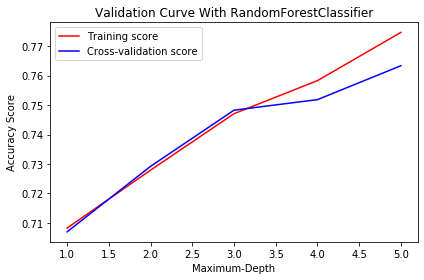

<h1>Confusion Matrix-Normalized</h1>

Confusion Matrix 
[[545  64]
 [156 243]]


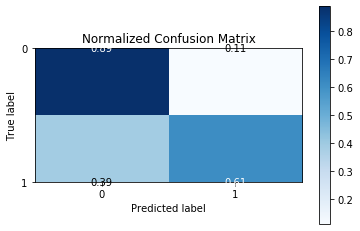

<h1>Churned Pie After Training</h1>

<h3>Test Data</h3>

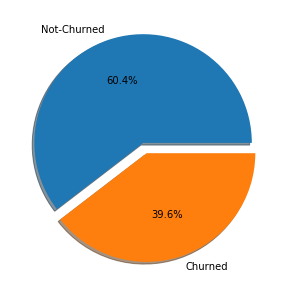

<h3>Predicted Data</h3>

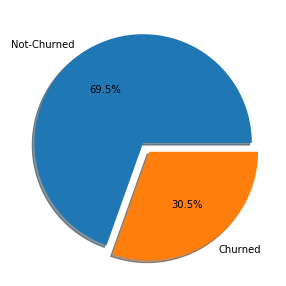

1    5
0    4
Name: Exited, dtype: int64
[1 0 0 1 1 0 1 0 0]


In [227]:
classifier_fun()